In [29]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import geopandas as gpd

import networkx as nx
import osmnx as ox
from libpysal import weights
import matplotlib.pyplot as plt
import momepy
from shapely.geometry import Polygon, Point
from copy import deepcopy

In [30]:
DATA_PATH = Path(os.getcwd()).parent / "gjson_dataset"
DATA_PATH.exists()

True

In [31]:
PROJECTED_CRS = 32637
GEOGRAPHIC_CRS = 4326

In [32]:
def merge_transport_datasets(bus_df: gpd.GeoDataFrame, subway_df: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    subway_df["TrType"] = "Subway"

    subway_df = subway_df.rename(columns={"Text": "Name"})

    subway_df = subway_df.drop(columns=["Number"])
    bus_df = bus_df.drop(columns=["TrStopId"])
    
    merged_df = pd.concat([bus_df, subway_df], ignore_index=True)
    merged_gdf = gpd.GeoDataFrame(merged_df, geometry="geometry")
    return merged_gdf

def get_street_json(version: int) -> str:
    file = DATA_PATH / f"Streets_{version}очередь.geojson"
    assert file.exists()
    return file

def get_house_json(version: int) -> str:
    file = DATA_PATH / f"House_{version}очередь_ЖК.geojson"
    assert file.exists()
    return file

def get_transport_points_gdf() -> gpd.GeoDataFrame:
    social_gdf = merge_transport_datasets(
        bus_df=gpd.read_file(DATA_PATH / 'Остановки_ОТ.geojson'),
        subway_df=gpd.read_file(DATA_PATH / 'Выходы_метро.geojson')
    )
    return social_gdf

In [56]:
transport_points = get_transport_points_gdf()
print(transport_points.head(3))
residential_complex = gpd.read_file(get_house_json(1))
print("\n", residential_complex.head(2))

                 TrType                Name                   geometry
0  Автобусная остановка          д. Дудкино  POINT (37.45345 55.63557)
1  Автобусная остановка  Академика Семёнова  POINT (37.50908 55.54359)
2  Автобусная остановка     СНТ Гавриково-1  POINT (37.50263 55.54162)

          Type                Purpose  Elevation  Entrances  Apartments  \
0  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
1  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   

     District            Street Number  \
0  Коммунарка  Потаповская Роща   2 к3   
1  Коммунарка  Потаповская Роща   1 к2   

                                            geometry  
0  POLYGON ((37.49657 55.54595, 37.49617 55.54561...  
1  POLYGON ((37.49447 55.54480, 37.49486 55.54488...  


In [58]:
residential_complex

,Type,Purpose,Elevation,Entrances,Apartments,District,Street,Number,geometry
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((37.49657 55.54595, 37.49617 55.54561..."
1,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к2,"POLYGON ((37.49447 55.54480, 37.49486 55.54488..."
2,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к1,"POLYGON ((37.49575 55.54432, 37.49560 55.54415..."
3,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к1,"POLYGON ((37.49338 55.54538, 37.49336 55.54531..."
4,Жилые дома,Малоэтажный жилой дом,3,3.0,98.0,Коммунарка,Потаповская Роща,2 к4,"POLYGON ((37.49718 55.54578, 37.49719 55.54568..."
5,Жилые дома,Малоэтажный жилой дом,3,4.0,66.0,Коммунарка,Потаповская Роща,2 к2,"POLYGON ((37.49500 55.54561, 37.49511 55.54553..."
6,Жилые дома,Малоэтажный жилой дом,3,4.0,96.0,Коммунарка,Потаповская Роща,2 к1,"POLYGON ((37.49388 55.54607, 37.49400 55.54537..."
7,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к2,"POLYGON ((37.49203 55.54591, 37.49177 55.54528..."
8,Жилые дома,Жилой дом,18,6.0,399.0,Коммунарка,Александры Монаховой,88 к1,"MULTIPOLYGON (((37.48656 55.54479, 37.48610 55..."
9,Жилые дома,Жилой дом,18,6.0,382.0,Коммунарка,Александры Монаховой,88 к2,"MULTIPOLYGON (((37.48523 55.54411, 37.48545 55..."


In [ ]:
residential_complex

In [34]:
streets = gpd.read_file(get_street_json(0))
# streets = gpd.read_file(momepy.datasets.get_path("bubenec"), layer="streets")
streets.crs  # This data is already in "4326"

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
from typing import Tuple

CropBox = Tuple[float, float, float, float]

def crop_gdf(gdf: gpd.GeoDataFrame, crop: CropBox) -> gpd.GeoDataFrame:
    x_min, y_max, x_max, y_min = crop
    crop_region = Polygon([(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)])
    return gdf[gdf.geometry.within(crop_region)]

In [36]:
x_min, y_max = 37.472381, 55.551288
x_max, y_min = 37.500082, 55.539195

In [37]:
streets = crop_gdf(streets, (x_min, y_max, x_max, y_min))
transport_points = crop_gdf(transport_points, (x_min, y_max, x_max, y_min))
# house = crop_gdf(house, (x_min, y_max, x_max, y_min))

In [39]:
def plot_gpd(lines: gpd.GeoDataFrame = None, points: gpd.GeoDataFrame = None, polygons: gpd.GeoDataFrame = None):
    fig, ax = plt.subplots(figsize=(8, 8))
    if lines is not None:
        lines.plot(ax=ax, color='gray', label='lines')
    if points is not None:
        points.plot(
            ax=ax,
            color='red',  # Choose a color that contrasts well with the streets
            marker='o',   # Use circle markers for points
            markersize=50,
            label='points'
        )
    if polygons is not None:
        polygons.plot(
            ax=ax,
            # color='red',  # Choose a color that contrasts well with the streets
            # marker='o',   # Use circle markers for points
            # markersize=50,
            # label='polygons'
        )
    ax.set_title('Streets and Transport Stops')
    ax.legend(labels=['lines', 'points'])
    
    # ax.set_xlim([transport_points.total_bounds[0], transport_points.total_bounds[2]])
    # ax.set_ylim([transport_points.total_bounds[1], transport_points.total_bounds[3]])
    
    plt.show()
    
def plot_graph(graph: nx.MultiGraph):
    fig, ax = plt.subplots(figsize=(8, 8))

    nx.draw(
        graph, {n: [n[0], n[1]] for n in list(graph.nodes)}, ax=ax, node_size=5
    )

    ax.set_title('Graph')

    plt.show()

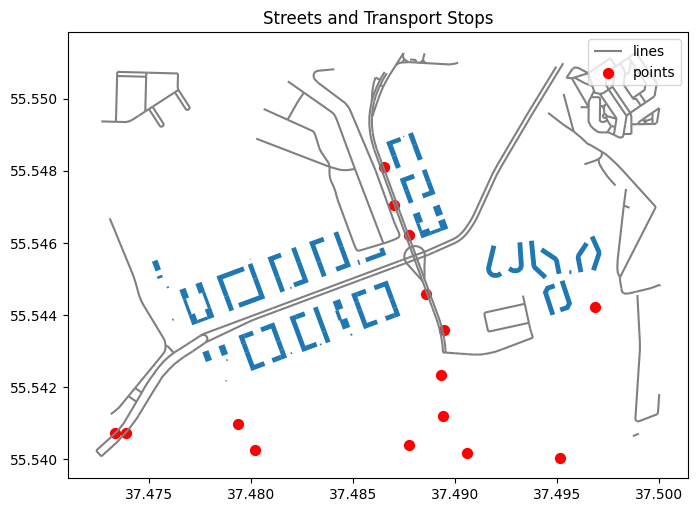

In [40]:
plot_gpd(streets, transport_points, residential_complex)

In [41]:
def get_graph(gdf: gpd.GeoDataFrame) -> nx.MultiGraph:
    gdf = gdf.iloc[:]
    if not gdf.crs.is_projected:
        print(f"DataFrame CRS is: {gdf.crs.srs} - not projected. Converting to {PROJECTED_CRS}...")
        gdf.to_crs(epsg=PROJECTED_CRS, inplace=True)
    return momepy.gdf_to_nx(gdf, approach="primal")

G = get_graph(streets)
G

DataFrame CRS is: EPSG:4326 - not projected. Converting to 32637...


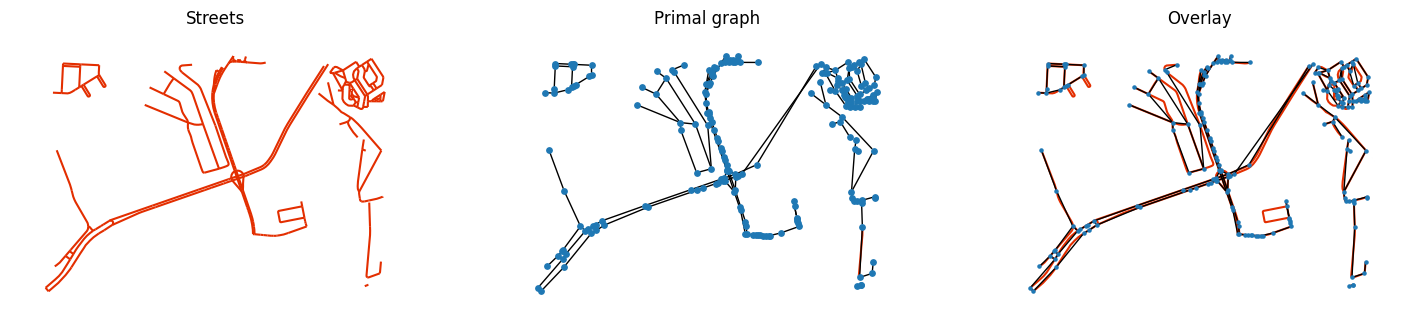

In [42]:
projected_streets = streets.to_crs(epsg=PROJECTED_CRS)
projected_transport_points = transport_points.to_crs(epsg=PROJECTED_CRS)
projected_house = house.to_crs(epsg=PROJECTED_CRS)
f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
projected_streets.plot(color="#e32e00", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Primal graph", "Overlay")[i])
    facet.axis("off")
nx.draw(
    G, {n: [n[0], n[1]] for n in list(G.nodes)}, ax=ax[1], node_size=15
)
projected_streets.iloc[:1].plot(color="#e32e00", ax=ax[1], zorder=-1)  # Костыль, чтобы выровнять второй плот

projected_streets.plot(color="#e32e00", ax=ax[2], zorder=-1)
nx.draw(
    G, {n: [n[0], n[1]] for n in list(G.nodes)}, ax=ax[2], node_size=5
)

# Graph Analysis

## Ниже читать пока нет смысла

In [23]:
min(G.nodes(), key=lambda n: n[0] + n[1])

(403618.6213613649, 6155952.465739982)

In [19]:
list(analyzer.G.nodes())[0]

(405278.86087323533, 6156024.750403195)

In [22]:
access_points = (projected_house.centroid.x, projected_house.centroid.y)

# Find closest node in street network
closest_node = min(G.nodes(),
                   key=lambda n: ((n[0] - access_point[0])**2 +
                                  (n[1] - access_point[1])**2)**0.5)


# Add building access point to graph
G.add_node(access_point, type='building')
weight = ((closest_node[0] - access_point[0])**2 +
          (closest_node[1] - access_point[1])**2)**0.5
G.add_edge(access_point, closest_node, weight=weight)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [16]:
import geopandas as gpd
import networkx as nx
import numpy as np
from shapely.geometry import Point, Polygon
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from scipy.spatial.distance import cdist

class PedestrianAccessibilityAnalyzer:
    def __init__(self, street_network_gdf, transport_points_gdf):
        """
        Initialize the analyzer with street network and transport points.
        
        Parameters:
        street_network_gdf (GeoDataFrame): Street network data
        transport_points_gdf (GeoDataFrame): Transport points (bus stops, etc.)
        """
        self.streets = street_network_gdf
        self.transport_points = transport_points_gdf
        self.G = self._create_base_graph()
        self.add_transport_points_to_graph()

        # Constants for calculations
        self.WALKING_SPEED = 5.0  # km/h
        self.MAX_WALKING_TIME = 15  # minutes

    def _create_base_graph(self):
        """Create initial graph from street network."""
        G = nx.Graph()

        # Add nodes and edges from street linestrings
        for idx, row in self.streets.iterrows():
            coords = list(row.geometry.coords)
            for i in range(len(coords) - 1):
                start = coords[i]
                end = coords[i + 1]
                # Calculate edge weight as Euclidean distance
                weight = ((end[0] - start[0])**2 + (end[1] - start[1])**2)**0.5
                G.add_edge(start, end, weight=weight)

        return G

    def add_transport_points_to_graph(self):
        """Add transport points to the graph by connecting to nearest street nodes."""
        for idx, point in self.transport_points.iterrows():
            point_coord = (point.geometry.x, point.geometry.y)

            # Find closest node in street network
            closest_node = min(self.G.nodes(),
                               key=lambda n: ((n[0] - point_coord[0])**2 +
                                              (n[1] - point_coord[1])**2)**0.5)

            # Add transport point to graph
            self.G.add_node(point_coord, type='transport', name=point['Name'])
            weight = ((closest_node[0] - point_coord[0])**2 +
                      (closest_node[1] - point_coord[1])**2)**0.5
            self.G.add_edge(point_coord, closest_node, weight=weight)

    def add_new_building(self, building_polygon):
        """
        Add new building to the graph and return its access point.
        
        Parameters:
        building_polygon (Polygon): Shapely polygon representing the new building
        
        Returns:
        tuple: Coordinates of the building's access point
        """
        # Calculate centroid as building access point
        access_point = (building_polygon.centroid.x, building_polygon.centroid.y)

        # Find closest node in street network
        closest_node = min(self.G.nodes(),
                           key=lambda n: ((n[0] - access_point[0])**2 +
                                          (n[1] - access_point[1])**2)**0.5)

        # Add building access point to graph
        self.G.add_node(access_point, type='building')
        weight = ((closest_node[0] - access_point[0])**2 +
                  (closest_node[1] - access_point[1])**2)**0.5
        self.G.add_edge(access_point, closest_node, weight=weight)

        return access_point

    def calculate_accessibility_metrics(self, building_access_point):
        """
        Calculate accessibility metrics for a building.
        
        Parameters:
        building_access_point (tuple): Coordinates of building access point
        
        Returns:
        dict: Dictionary containing accessibility metrics
        """
        metrics = {}

        # Find transport points in graph
        transport_nodes = [n for n, attr in self.G.nodes(data=True)
                           if attr.get('type') == 'transport']

        # Calculate shortest paths to all transport points
        distances = []
        for transport_node in transport_nodes:
            try:
                distance = nx.shortest_path_length(
                    self.G,
                    building_access_point,
                    transport_node,
                    weight='weight'
                )
                distances.append(distance)
            except nx.NetworkXNoPath:
                distances.append(float('inf'))

        # Calculate metrics
        metrics['avg_distance_to_transport'] = np.mean(distances)
        metrics['min_distance_to_transport'] = np.min(distances)
        metrics['max_distance_to_transport'] = np.max(distances)

        # Convert distances to walking times (minutes)
        walking_times = [d / (self.WALKING_SPEED / 60) for d in distances]
        metrics['avg_walking_time'] = np.mean(walking_times)
        metrics['transport_points_within_15min'] = sum(t <= self.MAX_WALKING_TIME
                                                       for t in walking_times)

        # Calculate accessibility score (0-100)
        score = self._calculate_accessibility_score(distances, walking_times)
        metrics['accessibility_score'] = score

        return metrics

    def _calculate_accessibility_score(self, distances, walking_times):
        """Calculate overall accessibility score."""
        # Normalize distances to 0-1 range
        scaler = MinMaxScaler()
        norm_distances = scaler.fit_transform(np.array(distances).reshape(-1, 1))

        # Calculate score components
        distance_score = 1 - np.mean(norm_distances)  # Higher is better
        coverage_score = sum(t <= self.MAX_WALKING_TIME for t in walking_times) / len(walking_times)

        # Combine scores (weighted average)
        final_score = (0.6 * distance_score + 0.4 * coverage_score) * 100
        return round(final_score, 2)

    def visualize_accessibility(self, building_access_point=None):
        """
        Create visualization of the network with accessibility analysis.
        
        Parameters:
        building_access_point (tuple, optional): Coordinates of building access point
        
        Returns:
        matplotlib figure: Plot showing the network and accessibility
        """
        import matplotlib.pyplot as plt

        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot street network
        self.streets.plot(ax=ax, color='gray', alpha=0.5, zorder=1)

        # Plot transport points
        transport_nodes = [(n[0], n[1]) for n, attr in self.G.nodes(data=True)
                           if attr.get('type') == 'transport']
        if transport_nodes:
            transport_points = gpd.GeoDataFrame(
                geometry=[Point(x, y) for x, y in transport_nodes],
                crs=self.streets.crs
            )
            transport_points.plot(ax=ax, color='blue', marker='o',
                                  label='Transport Stops', zorder=2)

        # Plot building access point if provided
        if building_access_point:
            ax.scatter([building_access_point[0]], [building_access_point[1]],
                       color='red', s=100, label='New Building', zorder=3)

            # Plot walking time isochrones
            self._plot_isochrones(ax, building_access_point)

        ax.legend()
        ax.set_title('Accessibility Analysis')

        return fig

    def _plot_isochrones(self, ax, building_access_point):
        """Plot walking time isochrones around building."""
        # Calculate distances from building to all nodes
        distances = dict(nx.single_source_dijkstra_path_length(
            self.G, building_access_point, weight='weight'))

        # Convert distances to walking times
        times = {node: d / (self.WALKING_SPEED / 60) for node, d in distances.items()}

        # Plot isochrones for 5, 10, and 15 minutes
        colors = ['#ffeda0', '#feb24c', '#f03b20']
        for minutes, color in zip([15, 10, 5], colors):
            nodes_within = [node for node, time in times.items() if time <= minutes]
            if nodes_within:
                points = gpd.GeoDataFrame(
                    geometry=[Point(x, y) for x, y in nodes_within],
                    crs=self.streets.crs
                )
                # Create buffer around points
                buffer = points.buffer(0.001)  # Adjust buffer size as needed
                buffer.plot(ax=ax, color=color, alpha=0.2,
                            label=f'{minutes} min walk')

# Example usage
def analyze_new_development(street_network_gdf, transport_points_gdf, new_building_polygon):
    """
    Analyze accessibility for a new development.
    
    Parameters:
    street_network_gdf (GeoDataFrame): Street network
    transport_points_gdf (GeoDataFrame): Transport points
    new_building_polygon (Polygon): New building geometry
    
    Returns:
    dict: Analysis results
    matplotlib figure: Visualization
    """
    # Initialize analyzer
    analyzer = PedestrianAccessibilityAnalyzer(street_network_gdf, transport_points_gdf)

    # Add new building and get its access point
    building_access_point = analyzer.add_new_building(new_building_polygon)

    # Calculate metrics
    metrics = analyzer.calculate_accessibility_metrics(building_access_point)

    # Create visualization
    fig = analyzer.visualize_accessibility(building_access_point)

    return metrics, fig

In [17]:
analyzer = PedestrianAccessibilityAnalyzer(projected_streets, projected_transport_points)

# Add new building and get its access point
building_access_point = analyzer.add_new_building(projected_transport_points)

# Calculate metrics
metrics = analyzer.calculate_accessibility_metrics(building_access_point)

# Create visualization
fig = analyzer.visualize_accessibility(building_access_point)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [357]:
projected_house.nodes

AttributeError: 'GeoDataFrame' object has no attribute 'nodes'

In [351]:
import networkx as nx
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
import torch
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool
import pandas as pd
from sklearn.preprocessing import StandardScaler


class PedestrianTrafficAnalyzer:
    def __init__(self, streets_gdf, base_graph=None):
        """
        Initialize the analyzer with street data and optional base graph
        
        Parameters:
        streets_gdf (GeoDataFrame): Street network data
        base_graph (networkx.Graph, optional): Pre-existing graph structure
        """
        self.streets_gdf = streets_gdf
        self.G = base_graph if base_graph else nx.Graph()
        self.transport_points = None
        self.buildings = []
        self.scaler = StandardScaler()
        self.model = self._create_gnn_model()

    def add_transport_points(self, transport_gdf):
        """
        Add transport points to the graph
        
        Parameters:
        transport_gdf (GeoDataFrame): Transport points with geometry and attributes
        """
        self.transport_points = transport_gdf

        # Add nodes for transport points with attributes
        for idx, point in transport_gdf.iterrows():
            node_id = f"transport_{idx}"
            self.G.add_node(
                node_id,
                type='transport',
                geometry=point.geometry,
                attributes=point.to_dict()
            )

            # Connect to nearest street nodes
            self._connect_to_nearest_streets(node_id, point.geometry)

    def add_building(self, building_polygon, building_type="residential"):
        """
        Add a new building to the graph
        
        Parameters:
        building_polygon (Polygon): Shapely polygon representing the building
        building_type (str): Type of building
        
        Returns:
        str: Building node ID
        """
        building_id = f"building_{len([n for n in self.G.nodes if 'building' in n])}"
        projected_house['centroid'] = projected_house.geometry.centroid

        # Iterate through each row and add to the graph
        for idx, row in projected_house.iterrows():
            centroid_coords = (row['centroid'].x, row['centroid'].y)
            G.add_node(centroid_coords, data=row['geometry'])
        # Add building node
        self.G.add_node(
            building_id,
            type='building',
            geometry=building_polygon['geometry'],
            building_type=building_type
        )
        self.buildings.append(building_id)

        # Connect to nearest street nodes
        centroid = building_polygon.centroid
        self._connect_to_nearest_streets(building_id, centroid)

        return building_id

    def _connect_to_nearest_streets(self, node_id, geometry, max_distance=100):
        """Connect a node to nearest street nodes within max_distance"""
        point = geometry if isinstance(geometry, Point) else geometry.centroid

        # Find nearest street nodes
        street_nodes = [n for n in self.G.nodes if 'street' in str(n)]
        for street_node in street_nodes:
            street_point = Point(self.G.nodes[street_node]['geometry'])
            distance = point.distance(street_point)

            if distance <= max_distance:
                self.G.add_edge(
                    node_id,
                    street_node,
                    weight=distance,
                    type='connection'
                )

    def _create_gnn_model(self):
        """Create and return the GNN model"""
        class TrafficGNN(torch.nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = GCNConv(10, 64)  # Input features -> hidden
                self.conv2 = GCNConv(64, 32)  # Hidden -> hidden
                self.conv3 = GCNConv(32, 1)   # Hidden -> output

            def forward(self, x, edge_index, batch):
                x = torch.relu(self.conv1(x, edge_index))
                x = torch.relu(self.conv2(x, edge_index))
                x = self.conv3(x, edge_index)
                return global_mean_pool(x, batch)

        return TrafficGNN()

    def _prepare_graph_features(self):
        """Prepare graph features for GNN input"""
        features = []
        for node in self.G.nodes:
            node_data = self.G.nodes[node]

            # Create feature vector
            feature = [
                1 if node_data.get('type') == 'transport' else 0,
                1 if node_data.get('type') == 'building' else 0,
                1 if node_data.get('type') == 'street' else 0,
                len(list(self.G.neighbors(node))),  # degree
                sum(self.G[node][neighbor]['weight'] for neighbor in self.G.neighbors(node)),
                # Add more relevant features...
            ]

            # Pad to 10 features
            feature.extend([0] * (10 - len(feature)))
            features.append(feature)

        return np.array(features)

    def analyze_traffic_impact(self, building_id):
        """
        Analyze traffic impact of a new building
        
        Parameters:
        building_id (str): ID of the building to analyze
        
        Returns:
        dict: Traffic impact analysis results
        """
        # Prepare features
        features = self._prepare_graph_features()
        features = self.scaler.fit_transform(features)

        # Convert to PyTorch Geometric data
        edge_index = torch.tensor([[u_idx, v_idx] for u_idx, (u, v, _) in
                                   enumerate(self.G.edges(data=True))
                                   for v_idx in [list(self.G.nodes()).index(v)]]).t()

        x = torch.tensor(features, dtype=torch.float)
        data = Data(x=x, edge_index=edge_index)

        # Get model prediction
        self.model.eval()
        with torch.no_grad():
            impact_score = self.model(data.x, data.edge_index, None)

        # Calculate actual metrics
        metrics = self._calculate_traffic_metrics(building_id, float(impact_score))

        return metrics

    def _calculate_traffic_metrics(self, building_id, impact_score,
                                   walking_speed_kmh=5.0):
        """Calculate concrete traffic metrics based on model output"""
        building_node = self.G.nodes[building_id]
        metrics = {
            'impact_score': impact_score,
            'affected_streets': [],
            'transport_accessibility': {}
        }

        # Constants for calculations
        WALKING_SPEED = walking_speed_kmh * 1000 / 60  # meters per minute

        # Find affected streets within 500m
        for node in self.G.nodes:
            if 'street' in str(node):
                street_point = Point(self.G.nodes[node]['geometry'])
                distance = building_node['geometry'].centroid.distance(street_point)

                if distance <= 500:  # 500m radius
                    congestion_factor = 1 + (impact_score * (1 - distance/500))
                    metrics['affected_streets'].append({
                        'street_id': node,
                        'distance': distance,
                        'congestion_factor': congestion_factor,
                        'estimated_walking_time': distance / (WALKING_SPEED / congestion_factor)
                    })

        # Calculate transport accessibility
        if self.transport_points is not None:
            for idx, transport in self.transport_points.iterrows():
                transport_point = transport.geometry
                distance = building_node['geometry'].centroid.distance(transport_point)

                # Calculate walking time considering congestion
                avg_congestion = np.mean([s['congestion_factor']
                                          for s in metrics['affected_streets']])
                walking_time = distance / (WALKING_SPEED / avg_congestion)

                metrics['transport_accessibility'][transport['Name']] = {
                    'distance': distance,
                    'walking_time_minutes': walking_time,
                    'transport_type': transport['TrType']
                }

        return metrics

    def visualize_impact(self, metrics, ax=None):
        """
        Visualize traffic impact on a map
        
        Parameters:
        metrics (dict): Output from analyze_traffic_impact
        ax (matplotlib.axes.Axes, optional): Axes to plot on
        """
        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 12))

        # Plot streets with color indicating congestion
        for street in metrics['affected_streets']:
            street_geom = self.G.nodes[street['street_id']]['geometry']
            color = plt.cm.RdYlGn_r(street['congestion_factor'] / 2)  # Normalize color
            gpd.GeoSeries([street_geom]).plot(ax=ax, color=color, linewidth=2)

        # Plot transport points
        if self.transport_points is not None:
            self.transport_points.plot(ax=ax, color='blue', marker='^',
                                       markersize=100, label='Transport')

        # Add legend and colorbar
        sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn_r)
        plt.colorbar(sm, ax=ax, label='Congestion Factor')
        ax.legend()
        ax.set_title('Traffic Impact Analysis')

        return ax

In [352]:
# Initialize the analyzer

analyzer = PedestrianTrafficAnalyzer(projected_streets)

# Add transport points
analyzer.add_transport_points(projected_transport_points)

# Add a new building
# building_polygon = Polygon([[x1,y1], [x2,y2], ...])  # Your building coordinates
building_id = analyzer.add_building(building_polygon=projected_house)

In [354]:
projected_house['geometry']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           POLYGON ((405141.905 6156573.666, 405115.635 6156535.919, 405123.449 6156490.606, 405108.674 6156488.062, 405100.855 6156533.371, 405103.324 6156544.492, 405129.599 6156582

In [349]:
analyzer._prepare_graph_features()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [350]:
analyzer

In [347]:

# Analyze traffic impact
impact_metrics = analyzer.analyze_traffic_impact(building_id)

# Visualize results
fig, ax = plt.subplots(figsize=(12, 12))
analyzer.visualize_impact(impact_metrics, ax=ax)
plt.show()

IndexError: index 0 is out of bounds for dimension 0 with size 0

In [318]:
house

,Type,Purpose,Elevation,Entrances,Apartments,District,Street,Number,geometry
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((37.49657 55.54595, 37.49617 55.54561..."
1,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к2,"POLYGON ((37.49447 55.5448, 37.49486 55.54488,..."
2,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к1,"POLYGON ((37.49575 55.54432, 37.4956 55.54415,..."
3,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к1,"POLYGON ((37.49338 55.54538, 37.49336 55.54531..."
4,Жилые дома,Малоэтажный жилой дом,3,3.0,98.0,Коммунарка,Потаповская Роща,2 к4,"POLYGON ((37.49718 55.54578, 37.49719 55.54568..."
5,Жилые дома,Малоэтажный жилой дом,3,4.0,66.0,Коммунарка,Потаповская Роща,2 к2,"POLYGON ((37.495 55.54561, 37.49511 55.54553, ..."
6,Жилые дома,Малоэтажный жилой дом,3,4.0,96.0,Коммунарка,Потаповская Роща,2 к1,"POLYGON ((37.49388 55.54607, 37.494 55.54537, ..."
7,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к2,"POLYGON ((37.49203 55.54591, 37.49177 55.54528..."
8,Жилые дома,Жилой дом,18,6.0,399.0,Коммунарка,Александры Монаховой,88 к1,"MULTIPOLYGON (((37.48656 55.54479, 37.4861 55...."
9,Жилые дома,Жилой дом,18,6.0,382.0,Коммунарка,Александры Монаховой,88 к2,"MULTIPOLYGON (((37.48523 55.54411, 37.48545 55..."


# Graph to DataFrame

In [257]:
momepy.nx_to_gdf(
    G, points=True, lines=True, spatial_weights=True
)

/Users/remainedmind/Tools/Environments/mlapi312/lib/python3.12/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


(                 x             y  nodeID                        geometry
 0    405278.860873  6.156025e+06       0   POINT (405278.861 6156024.75)
 1    405293.212729  6.156288e+06       1    POINT (405293.213 6156288.5)
 2    405289.151050  6.156415e+06       2  POINT (405289.151 6156414.916)
 3    405284.050572  6.156425e+06       3  POINT (405284.051 6156424.753)
 4    405265.828032  6.156421e+06       4  POINT (405265.828 6156420.892)
 ..             ...           ...     ...                             ...
 217  404749.670670  6.157145e+06     217  POINT (404749.671 6157144.636)
 218  405194.440853  6.157000e+06     218   POINT (405194.441 6156999.71)
 219  405198.908372  6.157001e+06     219  POINT (405198.908 6157000.756)
 220  405197.521164  6.156996e+06     220  POINT (405197.521 6156996.385)
 221  405199.441524  6.156975e+06     221  POINT (405199.442 6156975.343)
 
 [222 rows x 4 columns],
         EdgeId ST_NAME ST_TYP_BEF ST_NM_BASE ST_NM_CITY  FUNC_CLASS  \
 0        190